In [1]:
#import librares
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders  
import numpy as np
import pandas as pd
import cv2
import os
import numpy 
from PIL import Image
from sklearn import preprocessing
import random

In [2]:
#dir for dataset
train_dir = "./Dataset/train"
test_dir = "./Dataset/test"

In [3]:
img_size=48

In [4]:
#datagen
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [7]:
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\Users\Alexey\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
epochs = 45
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45
359/359 [==============================] - 65s 174ms/step - loss: 2.0812 - accuracy: 0.2241 - val_loss: 2.4090 - val_accuracy: 0.2479
Epoch 2/45
359/359 [==============================] - 13s 36ms/step - loss: 1.7690 - accuracy: 0.3089 - val_loss: 2.5289 - val_accuracy: 0.2584
Epoch 3/45
359/359 [==============================] - 13s 35ms/step - loss: 1.5785 - accuracy: 0.3840 - val_loss: 1.6970 - val_accuracy: 0.3862 l
Epoch 4/45
359/359 [==============================] - 13s 36ms/step - loss: 1.4149 - accuracy: 0.4562 - val_loss: 1.3071 - val_accuracy: 0.4916
Epoch 5/45
359/359 [==============================] - 13s 36ms/step - loss: 1.3140 - accuracy: 0.4965 - val_loss: 1.2765 - val_accuracy: 0.5189
Epoch 6/45
359/359 [==============================] - 14s 39ms/step - loss: 1.2487 - accuracy: 0.5212 - val_loss: 1.1701 - val_accuracy: 0.5391
Epoch 7/45
359/359 [==============================] - 13s 37ms/step - loss: 1.1989 - accuracy: 0.5434 - val_loss: 1.2786 - val_accura

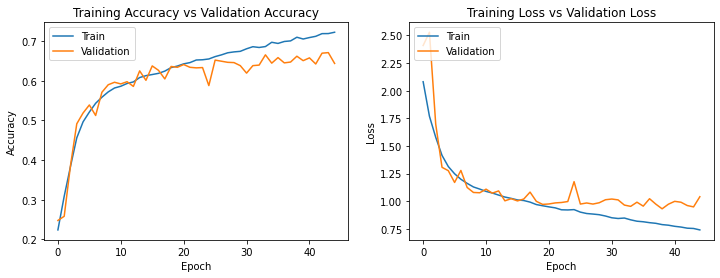

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [10]:
model.save_weights('model_weights_FER.h5')

In [85]:
from keras.preprocessing import image

In [88]:
img = image.load_img("C:/Users/Alexey/Documents/GitHub/Emotion-detection-M-IVT-21-/Dataset/test/angryim30.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Alexey/Documents/GitHub/Emotion-detection-M-IVT-21-/Dataset/test/angryim30.png'

In [27]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 0s 17ms/step - loss: 1.0409 - accuracy: 0.6439
final train accuracy = 71.91 , validation accuracy = 64.39


In [77]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [78]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[7.244744e-11, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [79]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [91]:
# Загрузка изображения
image_cv2 = cv2.imread("./test.jpeg")

# преобразуем изображение к оттенкам серого
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# инициализировать распознаватель лиц (каскад Хаара по умолчанию)
face_cascade = cv2.CascadeClassifier("haarcascade_fontalface_default.xml")

# обнаружение всех лиц на изображении
faces = face_cascade.detectMultiScale(image_gray)
# печатать количество найденных лиц

numfaces = 0
# для всех обнаруженных лиц рисуем синий квадрат
for x, y, width, height in faces:
    if (width-x)>20:
        cv2.rectangle(image_cv2, (x, y), (x + width, y + height), color=(255, 0, 0), thickness=2)
        numfaces+=1
        img = Image.open("./test.jpeg")
        img_crop = img.crop((x, y, x + width, y + height))
        img_crop.save("testing.jpg", quality=95)

print(f"{numfaces} лиц обнаружено на изображении.")
# сохраняем изображение с обнаруженными лицами
cv2.imwrite("kids_detected.jpg", image)
plt.imshow(image)
plt.show()

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [90]:
from PIL import Image as Image_PIL